1. Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

2. Đọc dữ liệu từ file

In [ ]:
Dataset = pd.read_csv("Housing.csv",header = None)

In [ ]:
Dataset.head(5)

,0,1,2,3,4,5
0,79545.46,6,7,4,23086.8,1059033.56
1,79248.64,6,7,3,40173.1,1505890.92
2,61287.07,6,9,5,36882.2,1058987.99
3,63345.24,7,6,3,34310.2,1260616.81
4,59982.20,5,8,4,26354.1,630943.49


In [ ]:
Dataset.shape

(5000, 6)

3. Tiền xử lý dữ liệu

In [ ]:
X = Dataset.drop(columns = Dataset.shape[1]-1)
y = Dataset.iloc[:,Dataset.shape[1]-1]

In [ ]:
X = pd.concat([pd.Series(1,index=X.index,name = "Bias"),X],axis = 1)

N,d = X.shape

theta = np.array([0]*d)

for i in range(0, d-1):
  X[i] = X[i] / np.max(X[i])

4. Xây dựng mô hình dự đoán

4.1. Hàm dự đoán

In [ ]:
def predict(X,theta):
  return theta*X

4.2. Hàm mất mát

In [ ]:
def loss_function(X,y,theta):
  y_hat = predict(X,theta)
  y_hat = np.sum(y_hat,axis = 1)
  return sum((y_hat - y)**2) / (2*N)

4.3. Hàm Gradient descent

In [ ]:
def gradient_descent(X,y,theta,learning_rate,iters):
  loss_history = []
  for iter in range(iters):
    y_hat = predict(X,theta)
    y_hat = np.sum(y_hat, axis = 1)
    for i in range(0, d):
      theta[i] = theta[i] - learning_rate*(sum((y_hat - y) * X.iloc[:,i])/N)
    loss = loss_function(X,y,theta)
    loss_history.append(loss)
  return theta, loss_history

In [ ]:
learning_rate = 0.02
iters = 100
theta, loss_history = gradient_descent(X, y, theta, learning_rate, iters)
theta

array([429090, 313051, 283339, 287094, 235928, 256152])

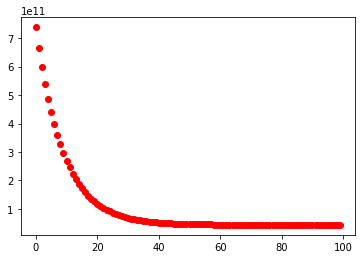

In [ ]:
plt.figure()
plt.scatter(x = list(range(0, iters)), y = loss_history,color = 'red')
plt.show()

In [ ]:
y_pred = predict(X,theta)
y_pred = np.sum(y_pred,axis = 1)

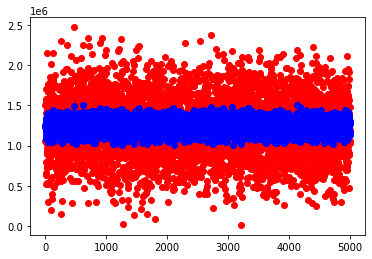

In [ ]:
plt.figure()
plt.scatter(x=list(range(0, N)),y = y, color = 'red')
plt.scatter(x=list(range(0, N)),y = y_pred, color = 'blue')
plt.show()

4.4. So sánh kết quả dự đoán

In [ ]:
y_pred.head(10)

0    1.232757e+06
1    1.261054e+06
2    1.316345e+06
3    1.195492e+06
4    1.185680e+06
5    1.193628e+06
6    1.320856e+06
7    1.239747e+06
8    1.077075e+06
9    1.339179e+06
dtype: float64

In [ ]:
Dataset = pd.read_csv("Housing.csv",header = None)
X = Dataset.drop(columns = Dataset.shape[1]-1)
y = Dataset.iloc[:,Dataset.shape[1]-1]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,y)
y_pr = model.predict(X)
y_pr

array([1275693.26993568, 1521243.33996772, 1317714.18293442, ...,
       1001471.07247614, 1334843.61993492, 1331232.45287466])

5. Đánh giá độ chính xác

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train, y_train)
y_pre = model.predict(X_test)
score_trained = r2_score(y_pre, y_test)
print ('Độ chính xác của mô hình = ',score_trained*100,'%')

Độ chính xác của mô hình =  87.21228171481833 %


6. Sử dụng mô hình

In [ ]:
X = pd.concat([pd.Series(1,index=X.index,name = "Bias"),X],axis = 1)

In [ ]:
#Sử dụng mô hình dự đoán giá nhà gồm các thông tin sau
#Thu nhập trung bình của khu vực: 65510.58
#Tuổi ngôi nhà: 6
#Tổng số phòng: 7
#Số phòng ngủ: 4
#Dân số khu vực: 46501.3
myhouse = np.array([[1,65510.58,6,7,4,46501.3]])
myhouse = myhouse.T
i=1
for j in range(0, d-1):
  myhouse[i] = myhouse[i] / np.max(X[j])
  i+=1
price_pred = predict(myhouse.T,theta)
price_pred = np.sum(price_pred,axis = 1)

print ('Giá nhà dự đoán: ',price_pred)

Giá nhà dự đoán:  [1278109.20878613]


In [ ]:
myhouse_skl = np.array([[65510.58,6,7,4,46501.3]])
price_pre = model.predict(myhouse_skl)
print ('Giá nhà khi dùng thư viện: ',price_pre)

Giá nhà khi dùng thư viện:  [1330458.59089285]
